In [27]:
from Data_loader import dummy_enc, dummy_enc_y
from Data_imputation import knn_imputer
import pandas as pd
from sklearn.preprocessing import StandardScaler
from FeatureSelection import TrSVD
from decision_tree_Classifiers import dt_kn_classfifier_kpca, dt_kn_classifier_kpca_kfold, dt_kn_classifier_kpca_stratfold
from GridSearch_params import split_data
import warnings
warnings.filterwarnings("ignore")

In [28]:
X_data = pd.read_csv("mushroom_trn_data.csv")
X_data_labels = pd.read_csv("mushroom_trn_class_labels.csv", header = None)
y = X_data_labels.drop(0, axis = 1)

In [29]:
import numpy as np
X_data['stalk-root'] = X_data['stalk-root'].replace('?', np.nan)

In [30]:
sscaler = StandardScaler()
X_data_enc = dummy_enc(X_data)
x_data_mean = knn_imputer(X_data_enc)
X_data_sc = sscaler.fit_transform(x_data_mean)

In [31]:
x_data_pca = TrSVD(X_data_sc)

In [32]:
x_tr, x_te, y_tr, y_te = split_data(x_data_pca, y)

Decision Tree Classifier without using any Cross-Validation Technique with Kernel PCA Feature Selection
Classification Report
              precision    recall  f1-score   support

           e       0.94      0.96      0.95       747
           p       0.96      0.93      0.95       716

    accuracy                           0.95      1463
   macro avg       0.95      0.95      0.95      1463
weighted avg       0.95      0.95      0.95      1463

Plotting the Confusion Matrix


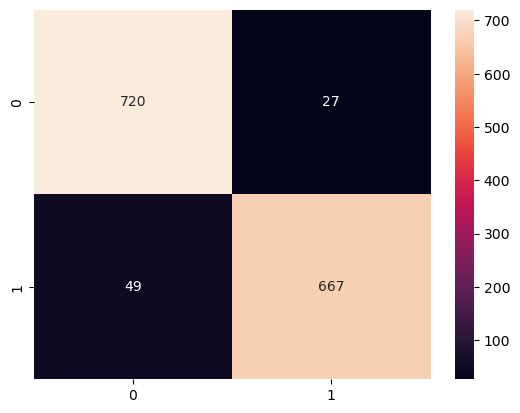

In [33]:
dt_kn_classfifier_kpca(x_tr, x_te, y_tr, y_te)

Decision Tree Classifier with K-Fold Cross-Validation Technique(K = 10) with Kernel PCA Feature Selection
Classification Report
	Precision Score(Macro): 0.95
	Precision Score(Weighted): 0.95

	Recall Score(Macro): 0.95
	Recall Score(Weighted): 0.95

	F1 Score(Macro): 0.95
	F1 Score(Weighted): 0.95
	Accuracy Score: 0.95
Plotting the Confusion Matrix


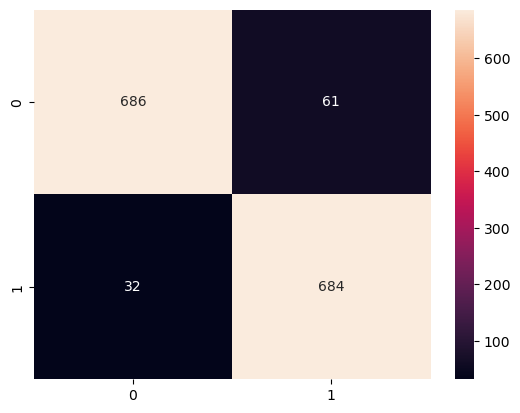

In [34]:
dt_kn_classifier_kpca_kfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)

Decision Tree Classifier with Stratified K-Fold Cross-Validation Technique and Kernel PCA Feature Extraction Technique
Classification Report
	Precision Score(Macro): 0.95
	Precision Score(Weighted): 0.95

	Recall Score(Macro): 0.95
	Recall Score(Weighted): 0.95

	F1 Score(Macro): 0.95
	F1 Score(Weighted): 0.95
	Accuracy Score: 0.95
Plotting the Confusion Matrix


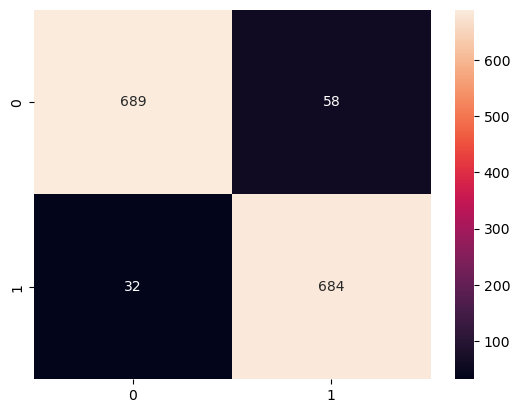

In [35]:
dt_kn_classifier_kpca_stratfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)

In [36]:
from random_forest_classifier import rft_kn_classifier_trsvd, rft_kn_classifier_trsvd_kfold, rft_kn_classifier_trsvd_stratfold

Random Forest Tree Classifier without using any Cross-Validation Technique and Truncated SVD Feature Selection
Classification Report
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       747
           p       1.00      1.00      1.00       716

    accuracy                           1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463

Plotting the Confusion Matrix


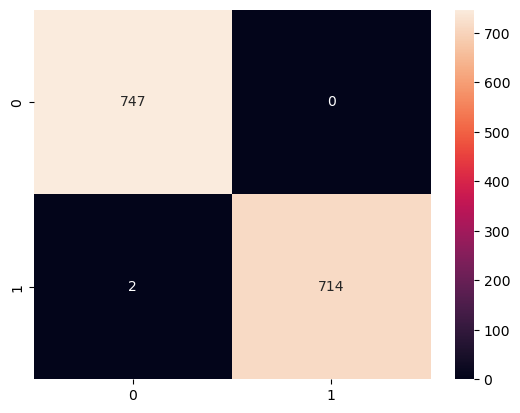

In [37]:
rft_kn_classifier_trsvd(x_tr, x_te, y_tr, y_te)

Random Forest Tree Classifier with K-Fold Cross-Validation Technique(K = 10) and Truncated SVD Feature Extraction
Classification Report
	Precision Score(Macro): 1.00
	Precision Score(Weighted): 1.00

	Recall Score(Macro): 1.00
	Recall Score(Weighted): 1.00

	F1 Score(Macro): 1.00
	F1 Score(Weighted): 1.00
	Accuracy Score: 1.00
Plotting the Confusion Matrix


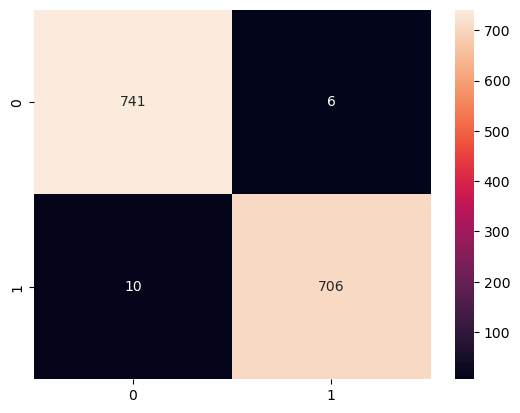

In [38]:
rft_kn_classifier_trsvd_kfold(x_data_pca,y,  x_tr, x_te, y_tr, y_te)

Random Forest Tree Classifier with Stratified K-Fold Cross-Validation Technique and Truncated SVD Feature Extraction Technique
Classification Report
	Precision Score(Macro): 1.00
	Precision Score(Weighted): 1.00

	Recall Score(Macro): 1.00
	Recall Score(Weighted): 1.00

	F1 Score(Macro): 1.00
	F1 Score(Weighted): 1.00
	Accuracy Score: 1.00
Plotting the Confusion Matrix


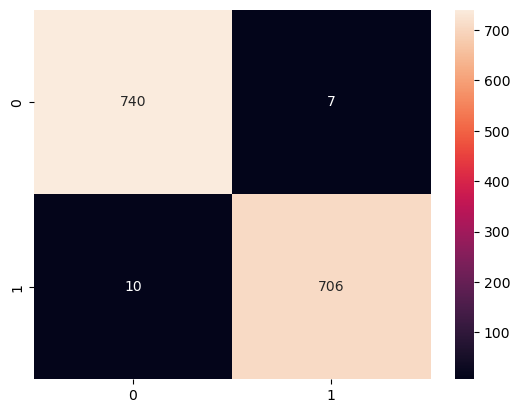

In [39]:
rft_kn_classifier_trsvd_stratfold(x_data_pca, y,x_tr, x_te, y_tr, y_te )

In [40]:
from logistic_regression_classifier import lr_kn_classifier_trsvd, lr_kn_classifier_trsvd_kfold, lr_kn_classifier_trsvd_stratfold

Logistic Regression Classifier without using any Cross-Validation Technique and Truncated SVD Feature Selection
Classification Report
              precision    recall  f1-score   support

           e       0.84      0.97      0.90       747
           p       0.96      0.81      0.88       716

    accuracy                           0.89      1463
   macro avg       0.90      0.89      0.89      1463
weighted avg       0.90      0.89      0.89      1463

Plotting the Confusion Matrix


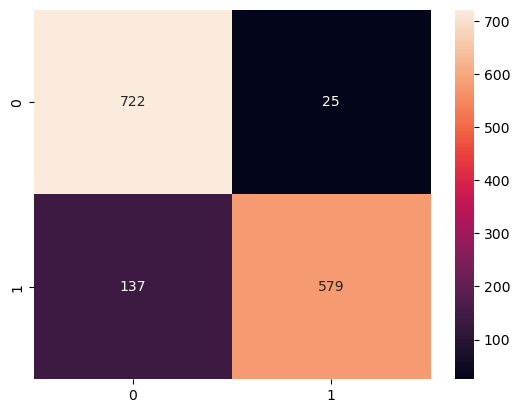

In [41]:
lr_kn_classifier_trsvd(x_tr, x_te, y_tr, y_te)

Random Forest Tree Classifier with K-Fold Cross-Validation Technique(K = 10) and Truncated SVD Feature Extraction
Classification Report
	Precision Score(Macro): 0.89
	Precision Score(Weighted): 0.89

	Recall Score(Macro): 0.88
	Recall Score(Weighted): 0.88

	F1 Score(Macro): 0.88
	F1 Score(Weighted): 0.88
	Accuracy Score: 0.88
Plotting the Confusion Matrix


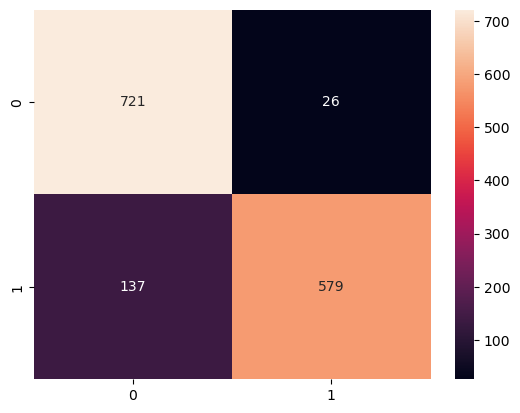

In [42]:
lr_kn_classifier_trsvd_kfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)

Logistic Regression Classifier with Stratified K-Fold Cross-Validation Technique and Truncated SVD Feature Extraction Technique
Classification Report
	Precision Score(Macro): 0.89
	Precision Score(Weighted): 0.89

	Recall Score(Macro): 0.88
	Recall Score(Weighted): 0.88

	F1 Score(Macro): 0.88
	F1 Score(Weighted): 0.88
	Accuracy Score: 0.88
Plotting the Confusion Matrix


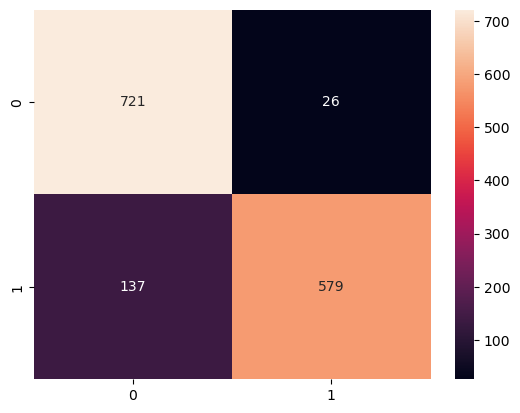

In [43]:
lr_kn_classifier_trsvd_stratfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)

In [44]:
y_enc = dummy_enc_y(y)
x_tr_y, x_te_y, y_tr_y, y_te_y = split_data(x_data_pca, y_enc)

In [45]:
from XGBoost_classifier import xgb_kn_classifier_trsvd, xgb_kn_classifier_trsvd_kfold, xgb_kn_classifier_trsvd_stratfold

XGBoosting Classifier without using any Cross-Validation Technique and Truncated SVD Feature Selection
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       747
           1       1.00      1.00      1.00       716

   micro avg       1.00      1.00      1.00      1463
   macro avg       1.00      1.00      1.00      1463
weighted avg       1.00      1.00      1.00      1463
 samples avg       1.00      1.00      1.00      1463

Plotting the Confusion Matrix


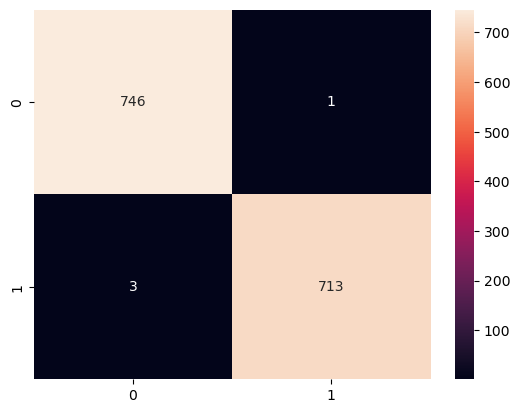

In [46]:
xgb_kn_classifier_trsvd(x_tr_y, x_te_y, y_tr_y, y_te_y)

XGBoosting Classifier with K-Fold Cross-Validation Technique(K = 10) and Truncated SVD Feature Extraction
Classification Report
	Precision Score(Macro): 1.00
	Precision Score(Weighted): 1.00

	Recall Score(Macro): 1.00
	Recall Score(Weighted): 1.00

	F1 Score(Macro): 1.00
	F1 Score(Weighted): 1.00
	Accuracy Score: 1.00
Plotting the Confusion Matrix


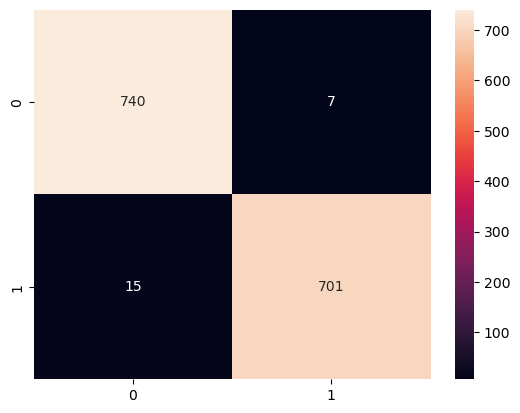

In [47]:
xgb_kn_classifier_trsvd_kfold(x_data_pca, y_enc, x_tr_y, x_te_y, y_tr_y, y_te_y)

XGBoosting with Stratified K-Fold Cross-Validation Technique and Truncated SVD Feature Extraction Technique
Classification Report
	Precision Score(Macro): 1.00
	Precision Score(Weighted): 1.00

	Recall Score(Macro): 1.00
	Recall Score(Weighted): 1.00

	F1 Score(Macro): 1.00
	F1 Score(Weighted): 1.00
	Accuracy Score: 1.00
Plotting the Confusion Matrix


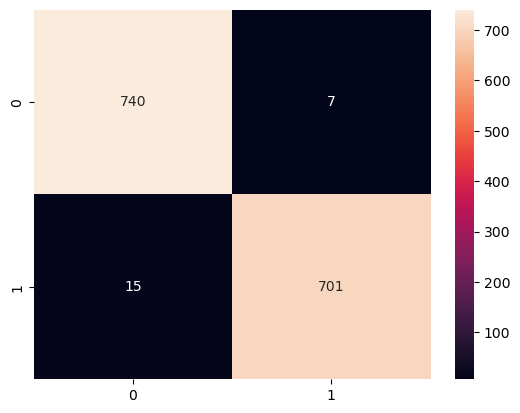

In [48]:
xgb_kn_classifier_trsvd_stratfold(x_data_pca, y_enc, x_tr_y, x_te_y, y_tr_y, y_te_y)

In [49]:
from support_vector_classifier import svc_kn_classifier_trsvd, svc_kn_classifier_trsvd_kfold, svc_kn_classifier_trsvd_stratfold

SVC Classifier without using any Cross-Validation Technique and Truncated SVD Feature Selection
Classification Report
              precision    recall  f1-score   support

           e       0.98      0.93      0.95       747
           p       0.93      0.98      0.95       716

    accuracy                           0.95      1463
   macro avg       0.95      0.95      0.95      1463
weighted avg       0.95      0.95      0.95      1463

Plotting the Confusion Matrix


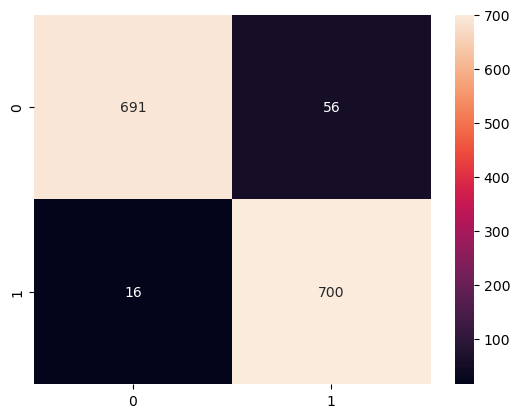

In [50]:
svc_kn_classifier_trsvd(x_tr, x_te, y_tr, y_te)


SVC Classifier with K-Fold Cross-Validation Technique(K = 10) and Truncated SVD Feature Extraction
Classification Report
	Precision Score(Macro): 0.96
	Precision Score(Weighted): 0.96

	Recall Score(Macro): 0.96
	Recall Score(Weighted): 0.96

	F1 Score(Macro): 0.96
	F1 Score(Weighted): 0.96
	Accuracy Score: 0.96
Plotting the Confusion Matrix


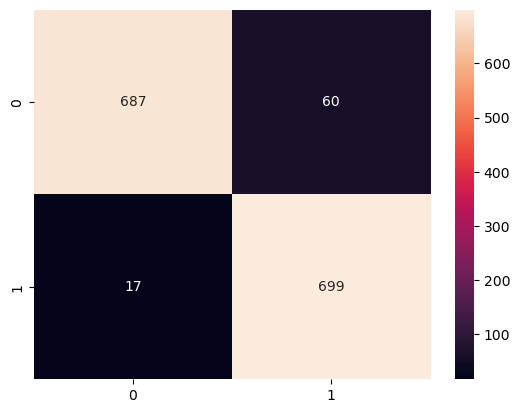

In [51]:
svc_kn_classifier_trsvd_kfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)


SVC Classifier with Stratified K-Fold Cross-Validation Technique and Truncated SVD Feature Extraction Technique
Classification Report
	Precision Score(Macro): 0.96
	Precision Score(Weighted): 0.96

	Recall Score(Macro): 0.96
	Recall Score(Weighted): 0.96

	F1 Score(Macro): 0.96
	F1 Score(Weighted): 0.96
	Accuracy Score: 0.96
Plotting the Confusion Matrix


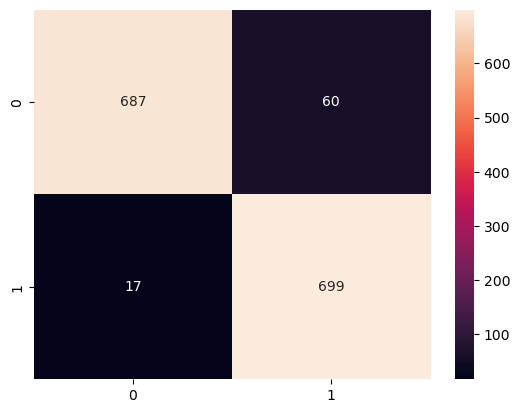

In [52]:
svc_kn_classifier_trsvd_stratfold(x_data_pca, y, x_tr, x_te, y_tr, y_te)
